In [130]:
using CUDA
using GLMakie

In [131]:
CUDA.allowscalar(false)

In [132]:
const nx = 41
const dx = 2 / (nx-1)
const nt = 25
const dt = 0.025
const c = 1

1

In [133]:
u = CuArray{Float64}(undef , nx);
u = CUDA.ones(nx)

41-element CuArray{Float32, 1, CUDA.Mem.DeviceBuffer}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [134]:
CUDA.allowscalar() do

    for i in range(Int(round(nx/3)), stop=Int(round(2*nx/3)))

        u[i] = 2;

    end

end

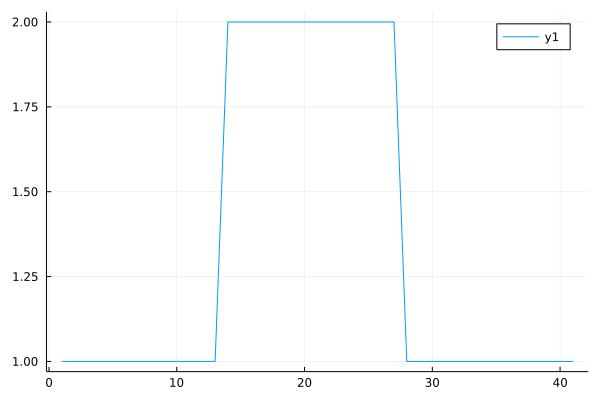

In [135]:
up = Array(u) 

pb = plot(up)

In [136]:
#@cuda threads=length(u) 
u_old = CuArray{Float64}(undef, nx)
u_new = CuArray{Float64}(undef, nx)
un = CuArray{Float64}(undef, nx-1)

for i in range(1, stop=nt)
    
    u_old = u[2:nx]
    u_new = u[1:nx-1]

    #println(length(u[2:nx]))

    un = u_old .+ ( - c * dt / dx) * (u_old .- u_new)

    #=
    CUDA.allowscalar() do 

        for i in range(2, stop=nx)
            u[i] = un[i]
        end
    end
    =#
end

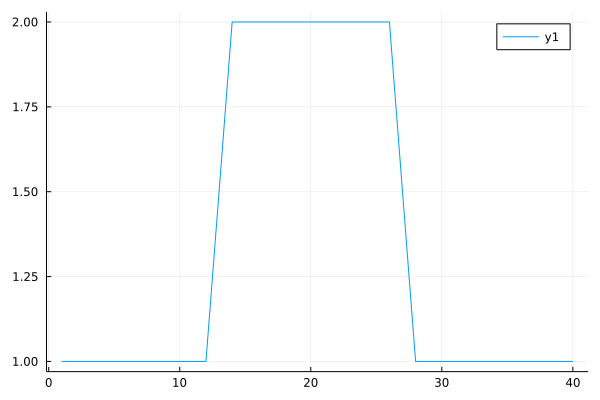

In [137]:
up = Array(un)

pa = plot(up)

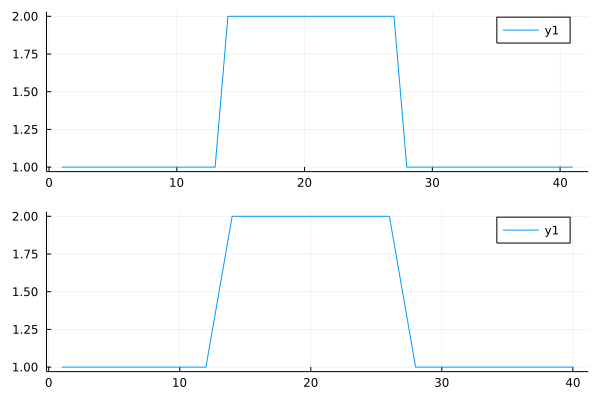

In [138]:
plot(pb, pa, layout=(2,1))